<a href="https://colab.research.google.com/github/chandra-gorentla/Mangos-App/blob/master/lesson3_mango.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
![ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 37.4 MB/s 
     |████████████████████████████████| 1.2 MB 57.5 MB/s 
     |████████████████████████████████| 4.4 MB 49.6 MB/s 
     |████████████████████████████████| 362 kB 57.1 MB/s 
     |████████████████████████████████| 1.1 MB 55.8 MB/s 
     |████████████████████████████████| 212 kB 65.0 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 140 kB 68.7 MB/s 
     |████████████████████████████████| 596 kB 74.0 MB/s 
     |████████████████████████████████| 127 kB 73.1 MB/s 
     |████████████████████████████████| 271 kB 68.0 MB/s 
     |████████████████████████████████| 144 kB 58.7 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
     |████████████████████████████████| 6.6 MB 63.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.

In [8]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import time

In [3]:
mango_types = ('Alphonso', 'Banganapalle', 'Chaunsa', 'Dasheri', 'Himsagar', 'Kesar', 'Langra', 'Neelam', 'Totapuri')

In [4]:
data_path = Path('/content/gdrive/MyDrive/mangoes')

In [5]:
key = os.environ.get('AZURE_SEARCH_KEY', 'e12438e2fc974944b68335ecccecd860')

In [12]:
for m_type in mango_types:
  search_m = m_type + ' mango'
  dest = (data_path/m_type)
  dest.mkdir(exist_ok=True)
  results = fastbook.search_images_bing(key, search_m)
  print(results)
  download_images(dest, urls=results.attrgot('contentUrl'))
  time.sleep(5)

# results = fastbook.search_images_ddg('banganapalli mangoes')
#results

[{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=Alphonso+mango&id=9DAE3C08F7065BD760AB2FF60CF2B318DEB2914F&simid=608039860488505029', 'name': 'A Grade Alphonso Mango, Wooden Box, Rs 3300 /box D M Associates | ID ...', 'thumbnailUrl': 'https://tse2.mm.bing.net/th?id=OIP.03DkpUlMW1VPtzqgpug1uQHaHG&pid=Api', 'datePublished': '2021-03-24T19:43:00.0000000Z', 'isFamilyFriendly': True, 'contentUrl': 'https://5.imimg.com/data5/SELLER/Default/2021/3/AD/JC/QB/8342626/alphonso-mango2.jpg', 'hostPageUrl': 'https://www.indiamart.com/proddetail/a-grade-alphonso-mango-23207077162.html', 'contentSize': '155243 B', 'encodingFormat': 'jpeg', 'hostPageDisplayUrl': 'https://www.indiamart.com/proddetail/a-grade-alphonso-mango-23207077162.html', 'width': 1042, 'height': 1000, 'hostPageDiscoveredDate': '2021-03-21T00:00:00.0000000Z', 'thumbnail': {'width': 474, 'height': 454}, 'imageInsightsToken': 'ccid_03DkpUlM*cp_8910FF97F49CAE0BDBF073C8E139FEC2*mid_9DAE3C08F7065BD760AB2F

In [13]:
image_files = get_image_files(data_path)
wrong_files = verify_images(image_files)
wrong_files

(#10) [Path('/content/gdrive/MyDrive/mangoes/Alphonso/00000027.jpg'),Path('/content/gdrive/MyDrive/mangoes/Alphonso/00000040.jpg'),Path('/content/gdrive/MyDrive/mangoes/Banganapalle/00000053.jpg'),Path('/content/gdrive/MyDrive/mangoes/Banganapalle/00000062.jpg'),Path('/content/gdrive/MyDrive/mangoes/Banganapalle/00000108.jpg'),Path('/content/gdrive/MyDrive/mangoes/Chaunsa/00000018.jpg'),Path('/content/gdrive/MyDrive/mangoes/Dasheri/00000012.jpg'),Path('/content/gdrive/MyDrive/mangoes/Dasheri/00000065.jpg'),Path('/content/gdrive/MyDrive/mangoes/Himsagar/00000055.jpg'),Path('/content/gdrive/MyDrive/mangoes/Langra/00000061.jpg')]

In [14]:
wrong_files.map(Path.unlink)

(#10) [None,None,None,None,None,None,None,None,None,None]

In [ ]:
#for o in mango_types:
#    # convert all PNG, GIF images to RGBA
#    for image in os.listdir(data_path/o):
#        ext = os.path.splitext(image)[1]
#        if ext in ['.png', '.gif', '.jpeg', '.jpg']:
#            new_filename = os.path.splitext(image)[0]+'.png'
#            print('ext - ' + ext)
#            print('name - ' + image)
#            print('first_part - ' + os.path.splitext(image)[1])
#            print('full path - ' + str(data_path/o/image))
#            img = Image.open(data_path/o/image)
#            img.convert('RGBA')
#            os.unlink(data_path/o/image)
#            img.save(str(data_path/o/new_filename))
#            print('saving: ' + new_filename)

In [21]:
mangoes = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42)
)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


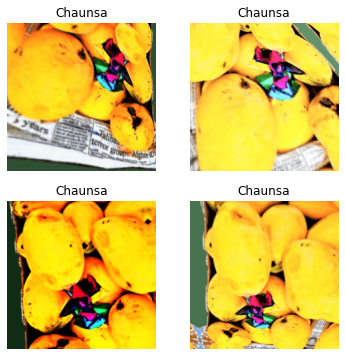

In [22]:
mangoes = mangoes.new(item_tfms = RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms(mult=2))
#mangoes = mangoes.new(item_tfms = Resize(128, method=ResizeMethod.Crop))
dls = mangoes.dataloaders(data_path)
dls.train.show_batch(max_n = 4, unique=True)

In [25]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(15, freeze_epochs=40)

epoch,train_loss,valid_loss,error_rate,time
0,3.599961,2.642793,0.902128,00:20
1,3.440691,2.536931,0.880851,00:20
2,3.324402,2.447568,0.863830,00:20
3,3.251721,2.380308,0.825532,00:20
4,3.182739,2.318004,0.782979,00:20
5,3.094387,2.246792,0.753191,00:20
6,2.989359,2.206110,0.753191,00:20
7,2.899245,2.130929,0.736170,00:20
8,2.781675,2.081118,0.744681,00:20
9,2.682960,2.037428,0.697872,00:20


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

epoch,train_loss,valid_loss,error_rate,time
0,1.111661,1.953826,0.574468,00:20
1,1.095289,1.935635,0.561702,00:20
2,1.067933,1.901075,0.553191,00:20
3,1.033987,2.049156,0.565957,00:21
4,1.003119,2.106366,0.544681,00:21
5,0.957980,2.120280,0.557447,00:21
6,0.914706,2.072594,0.540426,00:20
7,0.865134,2.157377,0.540426,00:22
8,0.823484,2.198702,0.502128,00:20
9,0.778374,2.119710,0.510638,00:21


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

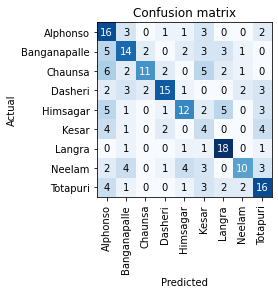

In [26]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix()

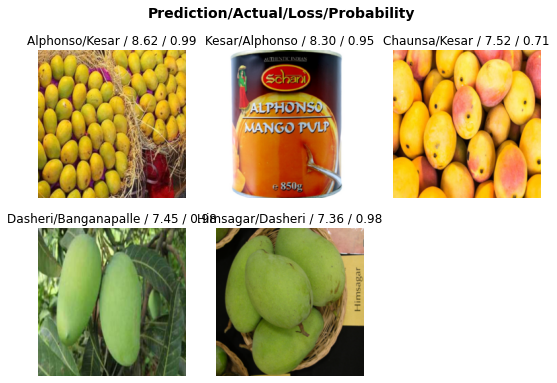

In [ ]:
interpret.plot_top_losses(5)

In [ ]:
cleaner = ImageClassifierCleaner(learn)

NameError: ignored

In [ ]:
cleaner

In [27]:
os.chdir(data_path)

In [28]:
learn.export()

In [ ]:
infer_learn = load_learner('export.pkl')

In [ ]:
os.listdir(data_path/'Test')

In [ ]:
infer_learn.predict(data_path/'Test'/'banganapalli.jpeg')

In [ ]:
infer_learn.predict(data_path/'Test'/'totapuri.jpeg')

In [ ]:
??infer_learn

In [ ]:
infer_learn.dls.vocab

In [ ]:
uploaded_file = widgets.FileUpload()

In [ ]:
uploaded_file

In [ ]:
uploaded_file.data[0]

In [ ]:
uploaded_images =PILImage.create(uploaded_file.data[0])

In [ ]:
uploaded_images

In [ ]:
cat, cat_idx, prob = infer_learn.predict(uploaded_images)

In [ ]:
print(f'Category - {cat}, Probability - {prob[cat_idx]:.04f}')

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(uploaded_images.to_thumb(64))
out_pl

In [ ]:
def on_classify_button(change):
  upl_image = PILImage.create(uploaded_file.data[-1])
  out_pl = widgets.Output()
  out_pl.clear_output()
  with out_pl: display(upl_image.to_thumb(64))
  cat, cat_idx, prob = infer_learn.predict(upl_image)
  lable.value = f'Category - {cat}, Probability - {prob[cat_idx]:.04f}'



In [ ]:
uploaded_file = widgets.FileUpload()
classify_button = widgets.Button(description='Classify Mango')
classify_button